# lista1_zadanie1

Instalowanie pakietu

In [3]:
install.packages('ISwR')

Installing package into 'C:/Users/Lenovo/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'ISwR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Lenovo\AppData\Local\Temp\RtmpMHq44E\downloaded_packages


Sprawdzanie czy pakiet został zainstalowany oraz powoływanie się na dany pakiet

In [1]:
system.file(package='ISwR')
library(ISwR)
#R.version

[1] "C:/Users/Lenovo/Documents/R/win-library/3.6/ISwR"

Warning message:
"package 'ISwR' was built under R version 3.6.3"

In [2]:
head(kfm)

# jak załadujemy paczkę to od razu dane kfm są przypisane do zmiennej 'kfm'

no,dl.milk,sex,weight,ml.suppl,mat.weight,mat.height
1,8.42,boy,5.002,250,65,173
4,8.44,boy,5.128,0,48,158
5,8.41,boy,5.445,40,62,160
10,9.65,boy,5.106,60,55,162
12,6.44,boy,5.196,240,58,170
16,6.29,boy,5.526,0,56,153


Zamiana zmiennej kateogrycznej (sex) z character (boy, girl) na liczbową (1,2). 1 to boy, 2 to girl.

In [3]:
kfm$sex_recode <- unclass(kfm$sex)
head(kfm)

no,dl.milk,sex,weight,ml.suppl,mat.weight,mat.height,sex_recode
1,8.42,boy,5.002,250,65,173,1
4,8.44,boy,5.128,0,48,158,1
5,8.41,boy,5.445,40,62,160,1
10,9.65,boy,5.106,60,55,162,1
12,6.44,boy,5.196,240,58,170,1
16,6.29,boy,5.526,0,56,153,1


a) Tworzenie modelu regresji wielokrotnej.

In [4]:
MultiReg <- lm(dl.milk ~ sex+ml.suppl + mat.weight + mat.height, data = kfm)

MultiReg_recode <- lm(dl.milk ~ sex_recode + ml.suppl + mat.weight + mat.height, data = kfm)

In [6]:
summary(MultiReg)
print('-------------------------------------------------------------------------------------------------------')
summary(MultiReg_recode)


Call:
lm(formula = dl.milk ~ sex + ml.suppl + mat.weight + mat.height, 
    data = kfm)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.49265 -0.89150  0.07478  0.63320  2.85558 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) -9.321172   5.056254  -1.843   0.0718 .
sexgirl     -0.756769   0.358408  -2.111   0.0403 *
ml.suppl    -0.001612   0.001440  -1.119   0.2691  
mat.weight   0.033686   0.026633   1.265   0.2124  
mat.height   0.091608   0.034855   2.628   0.0117 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.257 on 45 degrees of freedom
Multiple R-squared:  0.3652,	Adjusted R-squared:  0.3088 
F-statistic: 6.472 on 4 and 45 DF,  p-value: 0.0003343


[1] "-------------------------------------------------------------------------------------------------------"



Call:
lm(formula = dl.milk ~ sex_recode + ml.suppl + mat.weight + mat.height, 
    data = kfm)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.49265 -0.89150  0.07478  0.63320  2.85558 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) -8.564403   5.118139  -1.673   0.1012  
sex_recode  -0.756769   0.358408  -2.111   0.0403 *
ml.suppl    -0.001612   0.001440  -1.119   0.2691  
mat.weight   0.033686   0.026633   1.265   0.2124  
mat.height   0.091608   0.034855   2.628   0.0117 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.257 on 45 degrees of freedom
Multiple R-squared:  0.3652,	Adjusted R-squared:  0.3088 
F-statistic: 6.472 on 4 and 45 DF,  p-value: 0.0003343


b) Wpływ kategorycznej zmiennej 'sex'

Jak widać, jeśli pozostawimy zmienną sex jako character (boy, girl), to w modelu uzwględniony jest tylko jeden jej poziom (np. sexgilr). Jednak jeśli zmienimy zmienną sex na 1 i 2, to w modelu uzględnione są już obie płci.

c) Przedstaw i zinterpretuj wykres zależności parami oraz macierz korelacji między zmiennymi.

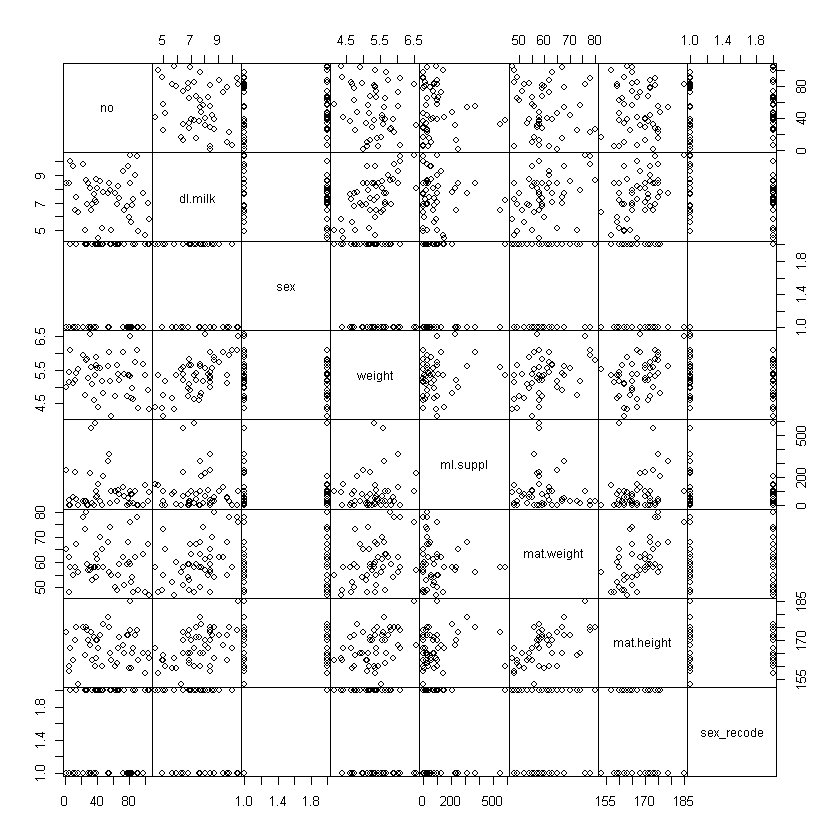

In [8]:
# wykres parami
par(mex = 0.5)
pairs(kfm, gap = 0, cex.labels = 0.9)

In [22]:
# macierz korelacji
kfm2 <- subset(kfm, select = -c(sex))
cor(kfm2, method = 'pearson')

# zastosowana korelacja Pearsona, ponieważ zakładamy, że dane pochodzą z rozkładu normalnego
# sprawdzamy siłę korelacji między zmiennymi
# można to po cześci interpretować podobnie jak R^2

,no,dl.milk,weight,ml.suppl,mat.weight,mat.height,sex_recode
no,1.00000000,-0.18068364,-0.1649280,-0.12978958,-0.13731160,-0.02356765,0.06193530
dl.milk,-0.18068364,1.00000000,0.6360448,-0.06351955,0.43427002,0.50504203,-0.29940126
weight,-0.16492803,0.63604482,1.0000000,0.12838120,0.40817476,0.38675714,-0.22001058
ml.suppl,-0.12978958,-0.06351955,0.1283812,1.00000000,-0.07887363,0.18230263,-0.07136717
mat.weight,-0.13731160,0.43427002,0.4081748,-0.07887363,1.00000000,0.56473304,-0.05303191
mat.height,-0.02356765,0.50504203,0.3867571,0.18230263,0.56473304,1.00000000,-0.11776734
sex_recode,0.06193530,-0.29940126,-0.2200106,-0.07136717,-0.05303191,-0.11776734,1.00000000


(d) Przyjmując poziom istotności równy 0.05 dokonaj krokowej procedury wyboru modelu startując z modelu zawierającego wszystkie zmienne i
eliminując zmienne nieistotne o największej p-wartości. Napisz i zinterpretuj
otrzymany końcowy model.

In [9]:
# startujemy od pełnego modelu i zchodzimy do modelu optymalnego

In [13]:
model1 <- lm(dl.milk ~ sex_recode + weight + ml.suppl + mat.weight + mat.height, data = kfm)
summary(model1)

# nie sotsujemy notacji w '.', ponieważ w kfm mamy zarówno zmienną 'sex' jak i 'sex_recode'

print('----------------------------------------------------------------------------------------------------')
print('Rozważamy, wszystkie zmienne. Czyli każda może zostac wyeliminowana na bazie swojego p-value')
print('pozbywamy się zmiennej mat.weight, ponieważ ma najwyższe p-value')


Call:
lm(formula = dl.milk ~ sex_recode + weight + ml.suppl + mat.weight + 
    mat.height, data = kfm)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.74201 -0.81173 -0.00926  0.78326  2.52646 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -11.182307   4.422334  -2.529 0.015114 *  
sex_recode   -0.499532   0.312672  -1.598 0.117284    
weight        1.349124   0.322450   4.184 0.000135 ***
ml.suppl     -0.002233   0.001241  -1.799 0.078829 .  
mat.weight    0.006212   0.023708   0.262 0.794535    
mat.height    0.072278   0.030169   2.396 0.020906 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.075 on 44 degrees of freedom
Multiple R-squared:  0.5459,	Adjusted R-squared:  0.4943 
F-statistic: 10.58 on 5 and 44 DF,  p-value: 1.03e-06


[1] "----------------------------------------------------------------------------------------------------"
[1] "Rozważamy, wszystkie zmienne. Czyli każda może zostac wyeliminowana na bazie swojego p-value"
[1] "pozbywamy się zmiennej mat.weight, ponieważ ma najwyższe p-value"


In [15]:
model2 <- lm(dl.milk ~ sex_recode + weight + ml.suppl + mat.height, data = kfm)
summary(model2)
print('-------------------------------------------------------------------------------------------------------')
print('Pozbywamy się zmiennej sex_recode, ponieważ ma najwyższe p-value.')


Call:
lm(formula = dl.milk ~ sex_recode + weight + ml.suppl + mat.height, 
    data = kfm)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.77312 -0.81196 -0.00683  0.76988  2.52240 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -11.617897   4.055322  -2.865  0.00632 ** 
sex_recode   -0.494675   0.308875  -1.602  0.11626    
weight        1.372524   0.306612   4.476 5.14e-05 ***
ml.suppl     -0.002313   0.001190  -1.943  0.05824 .  
mat.height    0.076363   0.025560   2.988  0.00454 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.064 on 45 degrees of freedom
Multiple R-squared:  0.5452,	Adjusted R-squared:  0.5047 
F-statistic: 13.48 on 4 and 45 DF,  p-value: 2.658e-07


[1] "-------------------------------------------------------------------------------------------------------"
[1] "Pozbywamy się zmiennej sex_recode, ponieważ ma najwyższe p-value."


In [17]:
model3 <- lm(dl.milk ~ weight + ml.suppl + mat.height, data = kfm)
summary(model3)
print('-------------------------------------------------------------------------------------------------------')
print('Pozbywamy się zmiennej ml.suppl, ponieważ ma najwyższe p-value.')


Call:
lm(formula = dl.milk ~ weight + ml.suppl + mat.height, data = kfm)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.06540 -0.74758 -0.02408  0.67488  2.79882 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -13.064926   4.020073  -3.250  0.00216 ** 
weight        1.464781   0.306231   4.783 1.81e-05 ***
ml.suppl     -0.002237   0.001209  -1.850  0.07074 .  
mat.height    0.077600   0.025979   2.987  0.00451 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.082 on 46 degrees of freedom
Multiple R-squared:  0.5192,	Adjusted R-squared:  0.4879 
F-statistic: 16.56 on 3 and 46 DF,  p-value: 1.953e-07


[1] "-------------------------------------------------------------------------------------------------------"
[1] "Pozbywamy się zmiennej ml.suppl, ponieważ ma najwyższe p-value."


In [19]:
model4 <- lm(dl.milk ~ weight + mat.height, data = kfm)
summary(model4)
print('-------------------------------------------------------------------------------------------------------')
print('Mamy wszystkie zmienne istotne w naszym modelu.')


Call:
lm(formula = dl.milk ~ weight + mat.height, data = kfm)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.19598 -0.82149  0.01822  0.75582  2.83375 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -11.92014    4.07325  -2.926  0.00527 ** 
weight        1.42862    0.31338   4.559 3.67e-05 ***
mat.height    0.07063    0.02636   2.680  0.01013 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.109 on 47 degrees of freedom
Multiple R-squared:  0.4835,	Adjusted R-squared:  0.4615 
F-statistic:    22 on 2 and 47 DF,  p-value: 1.811e-07


[1] "-------------------------------------------------------------------------------------------------------"
[1] "Mamy wszystkie zmienne istotne w naszym modelu."


Interpretacja końcowego modelu. Waga dziecka oraz wzrost matki wpływają istotnie na ilość spożywanego mleka. Równanie prostej regresji jest następujące y = 1.43(weight) + 0.07(mat.height). Jeśli mat.height jest stałe i jeśli weight wzrasta o 1, to dl.milk wzrasta o 1.43. Jeśli weight jest stałe i mat.height wzrasta o 1, to dl.milk wzrasta o 0.07. Generalnie model jest słaby, bo Adjusterd R2 wynosi jedynie 0.46.

# lista1_zadanie2

In [2]:
library(datasets)
data(iris)
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


(a) Narysuj histogramy rozkładu długości i szerokości kielicha dla trzech
analizowanych gatunków.

[1] setosa     versicolor virginica 
Levels: setosa versicolor virginica

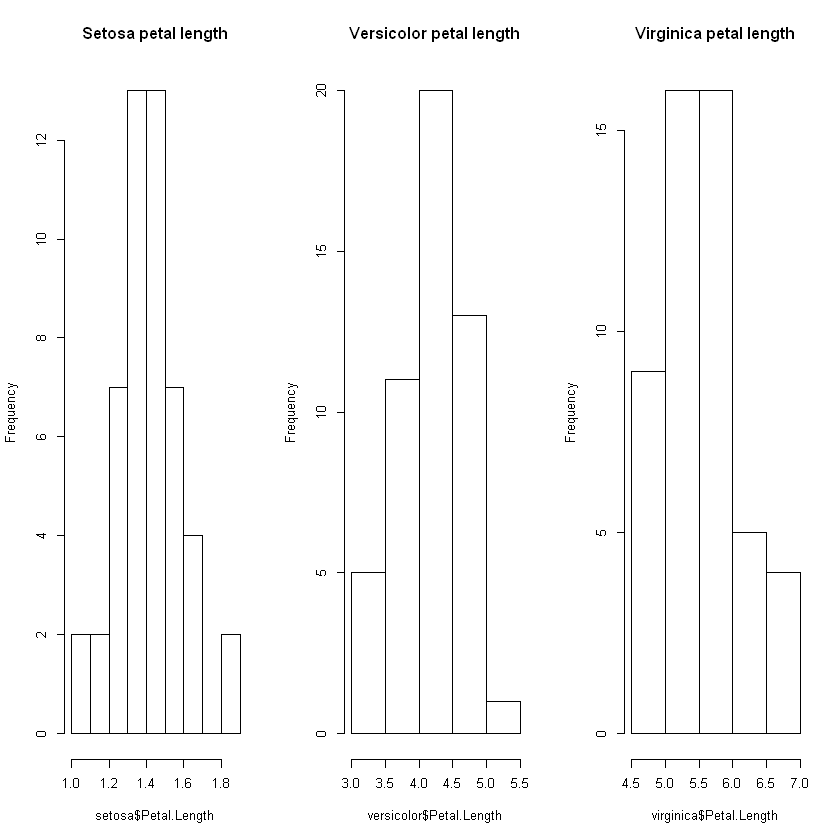

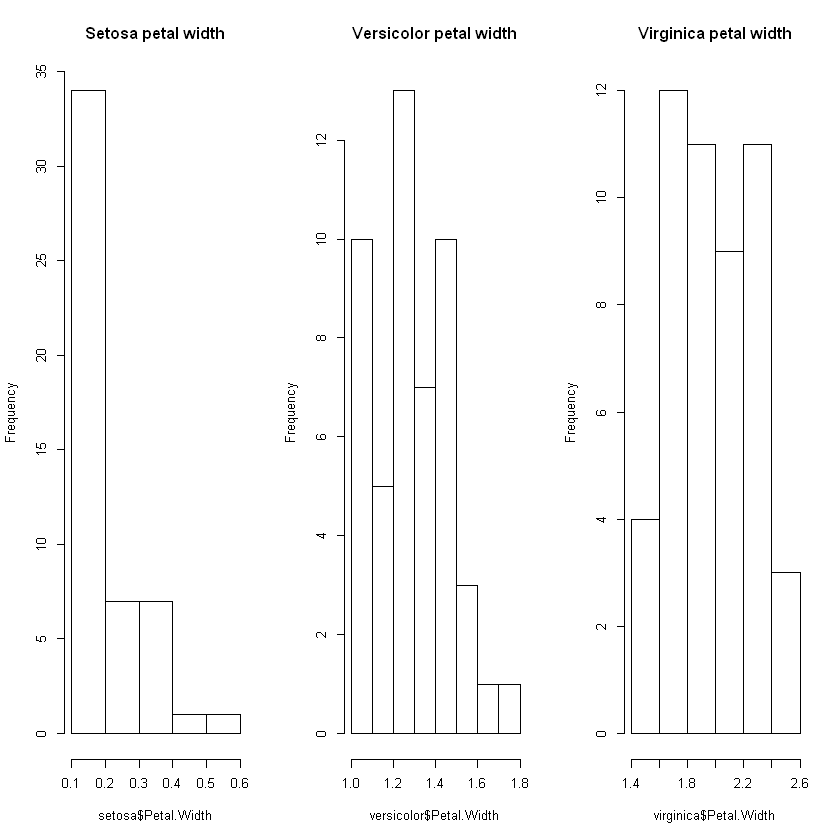

In [17]:
unique(iris$Species)

setosa <- iris[iris$Species == 'setosa', ]
versicolor <- iris[iris$Species == 'versicolor', ]
virginica <- iris[iris$Species == 'virginica', ]

par(mfrow = c(1,3))
hist(setosa$Petal.Length, main = 'Setosa petal length')
hist(versicolor$Petal.Length, main = 'Versicolor petal length')
hist(virginica$Petal.Length, main = 'Virginica petal length')
hist(setosa$Petal.Width, main = 'Setosa petal width')
hist(versicolor$Petal.Width, main = 'Versicolor petal width')
hist(virginica$Petal.Width, main = 'Virginica petal width')

# za pomocą histogramów sprawdzamy normalność cech

(b) Przedstaw wykresy korelacji parami dla długości i szerokości kielicha
oraz długości i szerokości płatka (dla każdego gatunku osobno). Jakie widzisz
zależności?


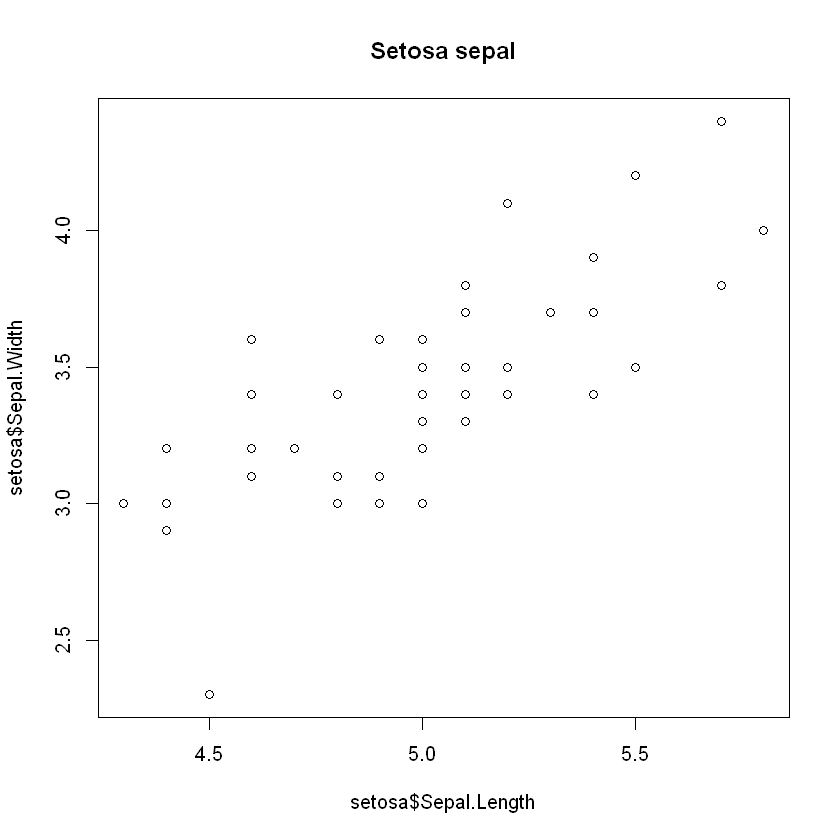

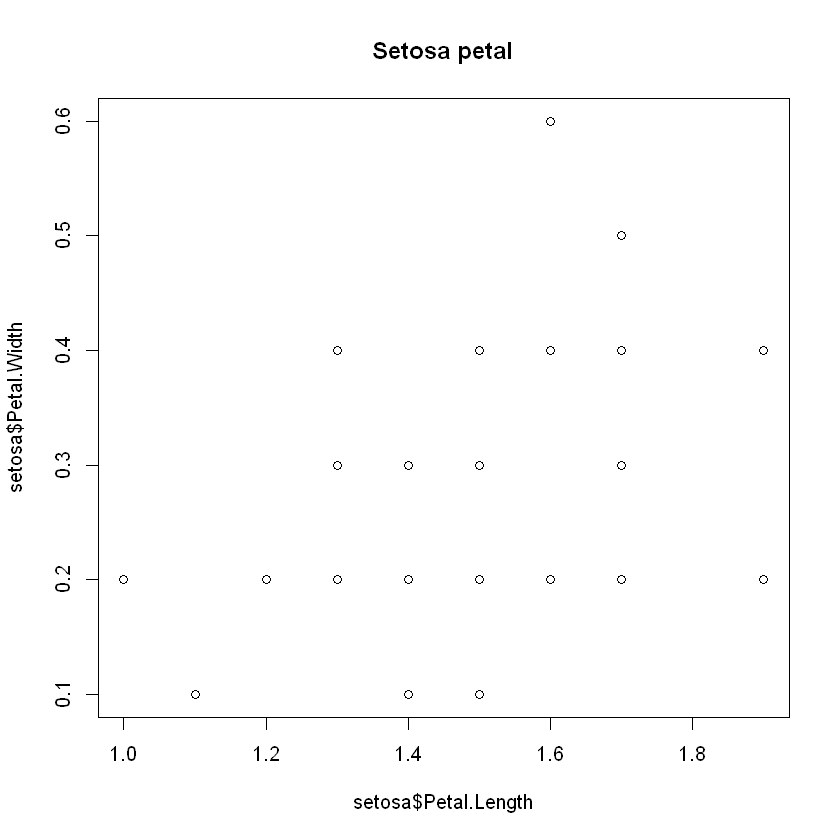

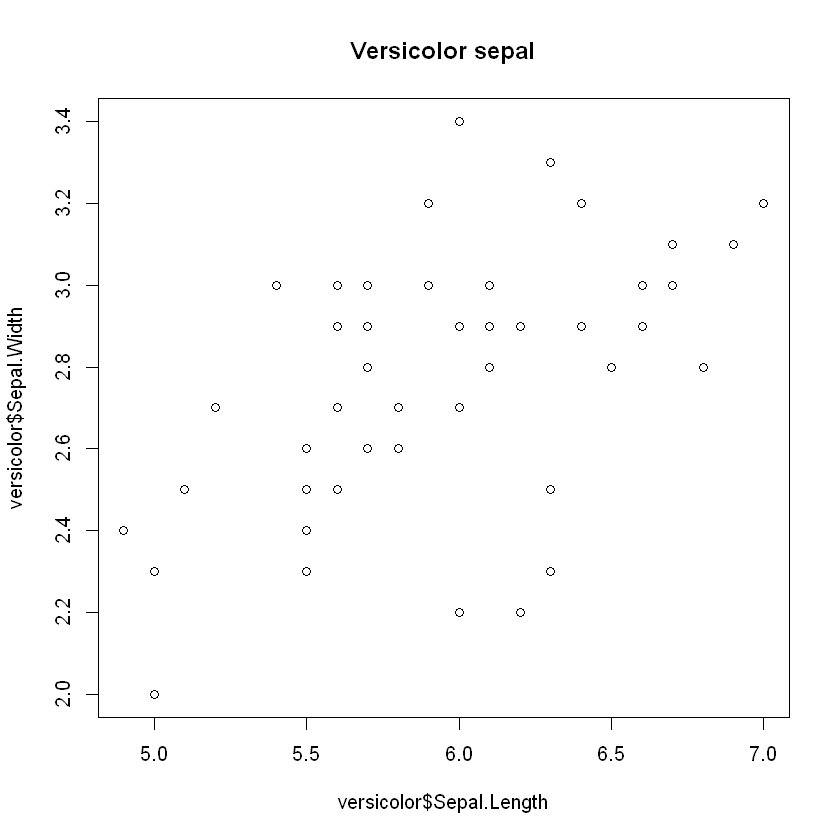

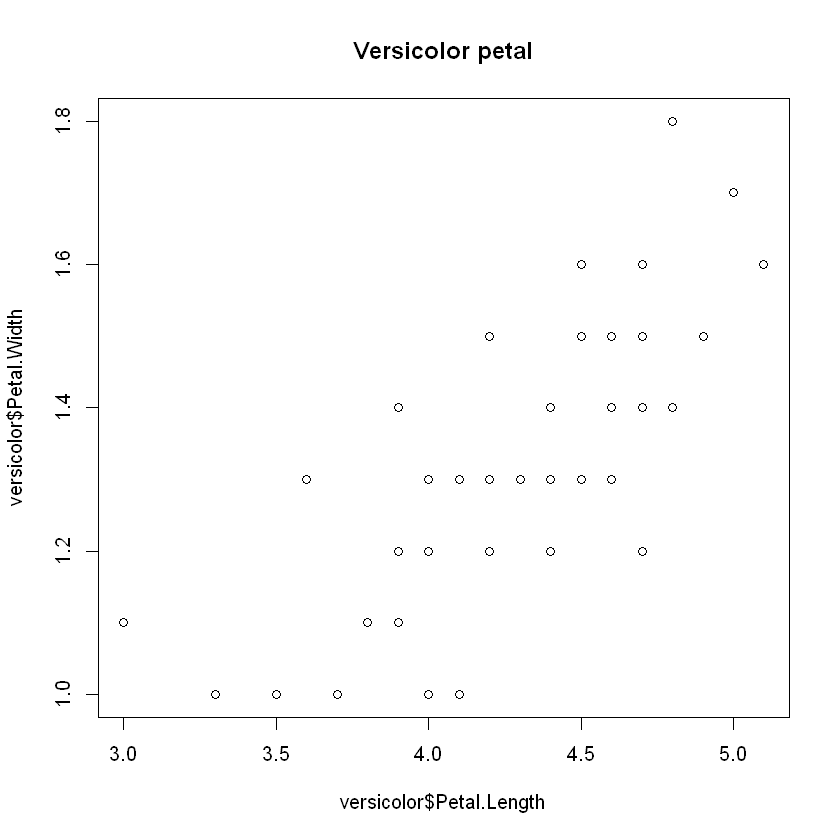

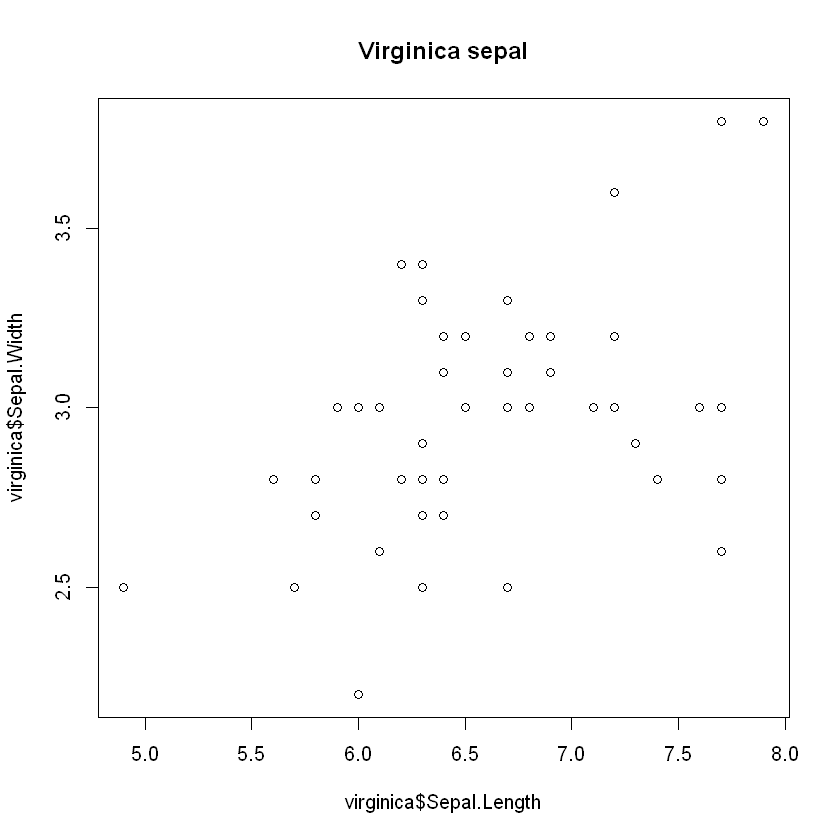

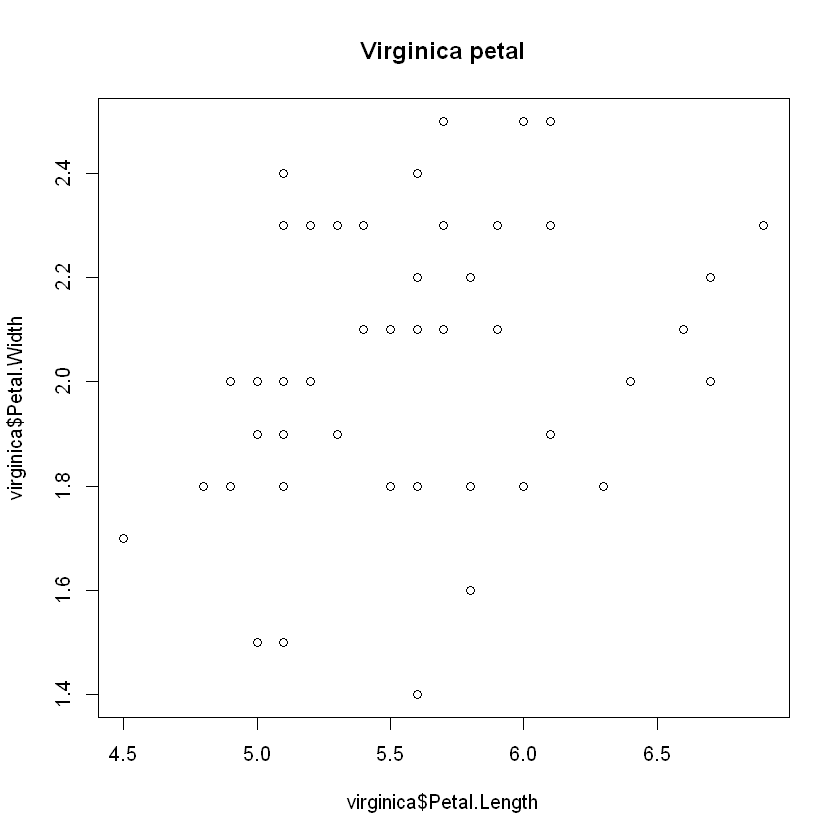

In [32]:
plot(setosa$Sepal.Length, setosa$Sepal.Width, main = 'Setosa sepal')
plot(setosa$Petal.Length, setosa$Petal.Width, main = 'Setosa petal')

plot(versicolor$Sepal.Length, versicolor$Sepal.Width, main = 'Versicolor sepal')
plot(versicolor$Petal.Length, versicolor$Petal.Width, main = 'Versicolor petal')

plot(virginica$Sepal.Length, virginica$Sepal.Width, main = 'Virginica sepal')
plot(virginica$Petal.Length, virginica$Petal.Width, main = 'Virginica petal')

# dla każdego gatunku widać dodatnią korelację szerokości z długością, zarówno u kielicha jak i u płatków
# czasami ta zależność jest mocniejsza a czasami słabsza

(c) Porównaj wartości współczynników korelacji dla długości kielicha i
długości płatka. Dla którego z gatunków korelacja ta jest największa? Sprawdź
istotność tych współczynników korelacji. Jakie dwie zmienne są najmocniej
skorelowane dla poszczególnych gatunków?

In [41]:
# stosujemy korelację Pearsona, ponieważ zmienne pochodzą z rozkładu normalnego

# test na istotność współczynnika korelacji
# H0: współczynnik korelacji nie jest istotnie różny od zera
#H1: współczynnik korelacji jest istotnie różny od zera

print('Setosa')
cor(setosa$Petal.Length, setosa$Sepal.Length, method = 'pearson')
cor.test(setosa$Petal.Length, setosa$Sepal.Length, alternative = 'two.sided', method = 'pearson')$p.val
print('--------------------------------------------------------------------------------------------------------------')
print('Versicolor')
cor(versicolor$Petal.Length, versicolor$Sepal.Length, method = 'pearson')
cor.test(versicolor$Petal.Length, versicolor$Sepal.Length, alternative = 'two.sided', method = 'pearson')$p.val
print('--------------------------------------------------------------------------------------------------------------')
print('Virginica')
cor(virginica$Petal.Length, virginica$Sepal.Length, method = 'pearson')
cor.test(virginica$Petal.Length, virginica$Sepal.Length, alternative = 'two.sided', method = 'pearson')$p.val
print('--------------------------------------------------------------------------------------------------------------')



# najsilniejsza jest korelacja między długością kielicha i płatka w przypadku gatunku Virginica
# liczbowo współczynnik korelacji jest co do modułu największy
# potwierdza to także najniższe p-value z testu na istotność współczynnika korelacji

[1] "Setosa"


[1] 0.2671758

[1] 0.06069778

[1] "--------------------------------------------------------------------------------------------------------------"
[1] "Versicolor"


[1] 0.754049

[1] 2.58619e-10

[1] "--------------------------------------------------------------------------------------------------------------"
[1] "Virginica"


[1] 0.8642247

[1] 6.297786e-16

[1] "--------------------------------------------------------------------------------------------------------------"


(d) Dla gatunku setosa przeanalizuj i zinterpretuj wpływ zmiennych objaśniających Petal.Width (szerokość płatka), Sepal.Length (długość
kielicha), Sepal.Width (szerokość kielicha) na zmienną Petal.Length
(długość płatka) przy użyciu modelu regresji wielokrotnej. Przyjmując
poziom istotności równy 0.05 dokonaj krokowej procedury wyboru modelu
eliminując zmienne nieistotne o największej p-wartości. Napisz i zinterpretuj
otrzymany końcowy model.
Wskazówka: Aby wyodrębnić gatunki można użyć procedury:
iris.versicolor <- iris[iris$Species=="versicolor",1:4]
iris.setosa <- iris[iris$Species=="setosa",1:4]
iris.virginica <- iris[iris$Species=="virginica",1:4]

In [42]:
# startujemy od pęłnego modelu i zchodzimy do najbardziej optymalnego

In [44]:
model1 <- lm(Petal.Length ~ Petal.Width + Sepal.Length + Sepal.Width, data = setosa)
summary(model1)

print('Pozbywamy się zmiennej Sepal.Width, ponieważ ma najwyższe p-value.')


Call:
lm(formula = Petal.Length ~ Petal.Width + Sepal.Length + Sepal.Width, 
    data = setosa)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38868 -0.07905  0.00632  0.10095  0.48238 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)   0.86547    0.34331   2.521   0.0152 *
Petal.Width   0.46253    0.23410   1.976   0.0542 .
Sepal.Length  0.11606    0.10162   1.142   0.2594  
Sepal.Width  -0.02865    0.09334  -0.307   0.7602  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1657 on 46 degrees of freedom
Multiple R-squared:  0.1449,	Adjusted R-squared:  0.08914 
F-statistic: 2.598 on 3 and 46 DF,  p-value: 0.06356


[1] "Pozbywamy się zmiennej Sepal.Width, ponieważ ma najwyższe p-value."


In [46]:
model2 <- lm(Petal.Length ~ Petal.Width + Sepal.Length, data = setosa)
summary(model2)

print('Pozbywamy się zmiennej Sepal.Length, ponieważ ma najwyższe p-value.')


Call:
lm(formula = Petal.Length ~ Petal.Width + Sepal.Length, data = setosa)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.40293 -0.08425  0.00073  0.09455  0.47839 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)   0.88128    0.33614   2.622   0.0117 *
Petal.Width   0.45959    0.23164   1.984   0.0531 .
Sepal.Length  0.09342    0.06925   1.349   0.1838  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1641 on 47 degrees of freedom
Multiple R-squared:  0.1432,	Adjusted R-squared:  0.1067 
F-statistic: 3.926 on 2 and 47 DF,  p-value: 0.0265


[1] "Pozbywamy się zmiennej Sepal.Length, ponieważ ma najwyższe p-value."


In [48]:
model3 <- lm(Petal.Length ~ Petal.Width, data = setosa)
summary(model3)

# teraz mamy optymalny model, ponieważ wszystkie zmienne niezależne istotnie wpływają na zmienną zależną
# Petal.Width i Petal.Length są dodatnio skorelowane
# jeśli Petal.Width wzrośnie o jeden, to Petal.Length wzrośnie o 0.55


Call:
lm(formula = Petal.Length ~ Petal.Width, data = setosa)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.43686 -0.09151 -0.03686  0.09018  0.46314 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.32756    0.05996  22.141   <2e-16 ***
Petal.Width  0.54649    0.22439   2.435   0.0186 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1655 on 48 degrees of freedom
Multiple R-squared:   0.11,	Adjusted R-squared:  0.09144 
F-statistic: 5.931 on 1 and 48 DF,  p-value: 0.01864
